<a href="https://colab.research.google.com/github/hannah-anonuevo/Market-Trends-of-Commercial-Laptops/blob/main/Market_Trends_of_Commercial_Laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style("whitegrid")
sns.set_context("poster")
pd.options.display.float_format =  '{:.2f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
excel_file_path = "/content/drive/MyDrive/Anonuevo - DSELE11 Week 2 - Practice Problem.xlsx"
sheet_name = 'Dataset 2'
columns_to_exclude = ['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
df = df.drop(columns=columns_to_exclude, errors='ignore')
df.head()

,Listing,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68
1,1,Apple,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52
2,2,HP,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00
3,3,Apple,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.30
4,4,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81


**Measurements of Frequency**



In [ ]:
df.describe()

,Listing,Inches,Price
count,1270.00,1270.00,1270.00
mean,653.07,15.13,59886.07
std,376.68,1.96,37323.78
min,0.00,10.10,9270.72
25%,327.25,14.00,31914.72
50%,652.50,15.60,52054.56
75%,980.75,15.60,79303.82
max,1302.00,35.60,324954.70


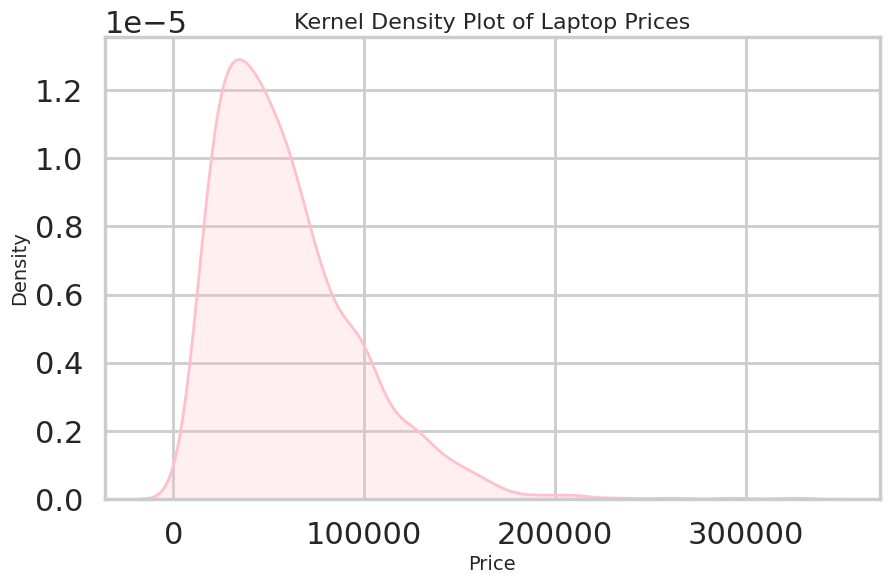

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price'], color='pink', fill=True)
plt.title('Kernel Density Plot of Laptop Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

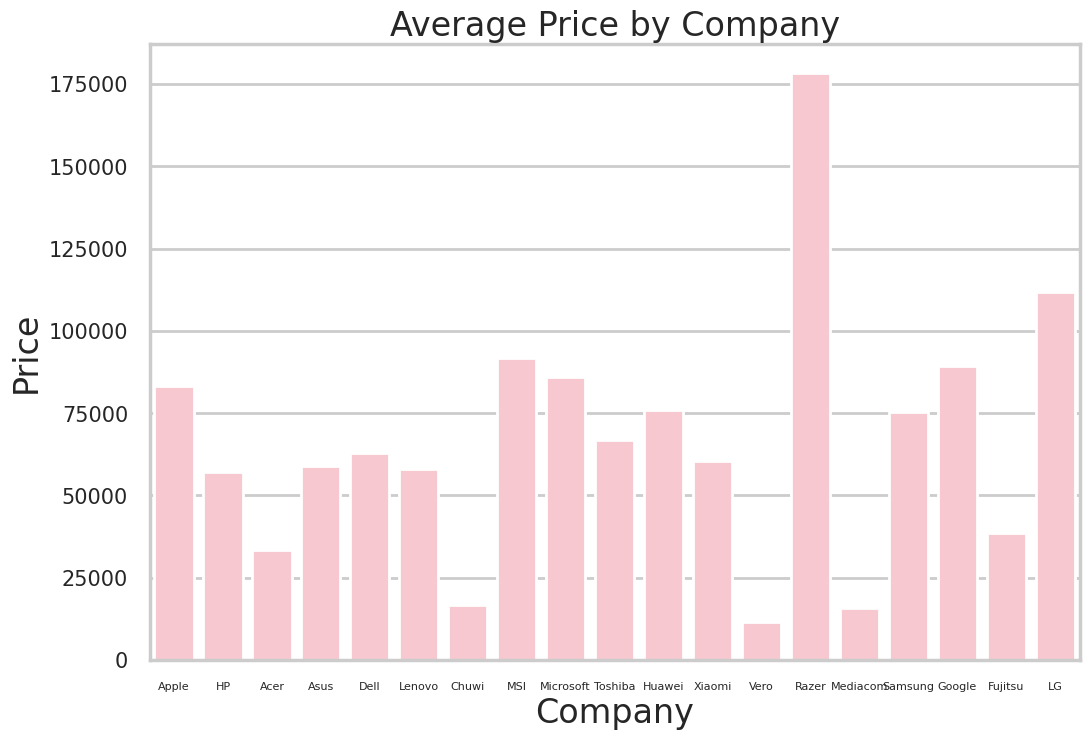

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x ='Company', y ='Price', data = df, errorbar=None, color='pink')
plt.title('Average Price by Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 8)
plt.show()

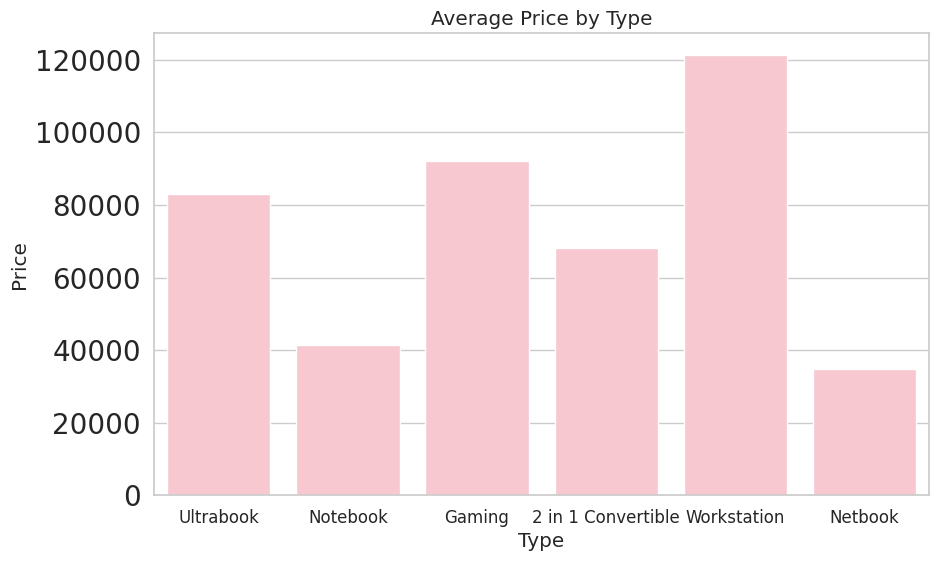

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x ='TypeName', y ='Price', data = df, errorbar=None, color='pink')
plt.title('Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

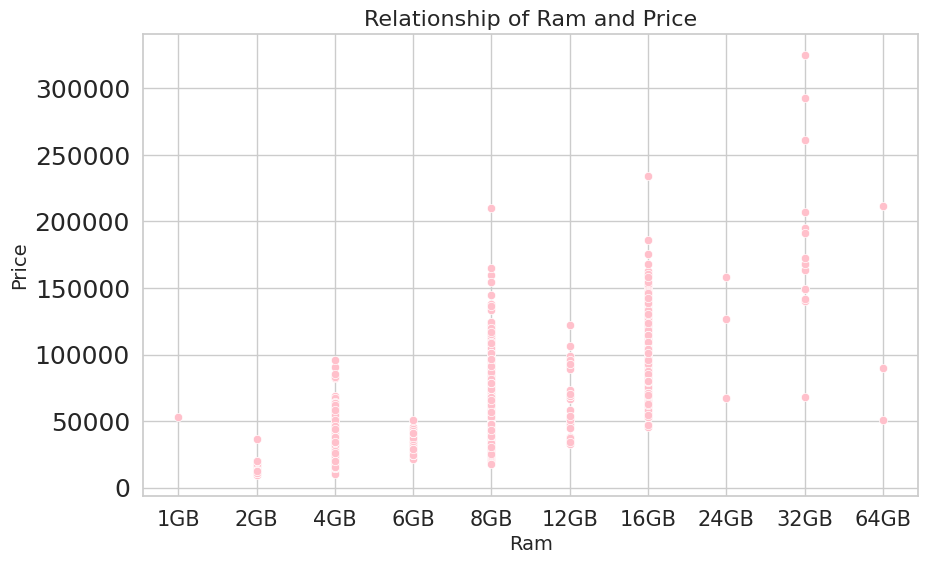

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price', data=df, color='pink')
plt.title('Relationship of Ram and Price', fontsize=16)
plt.xlabel('Ram', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=18)
plt.show()

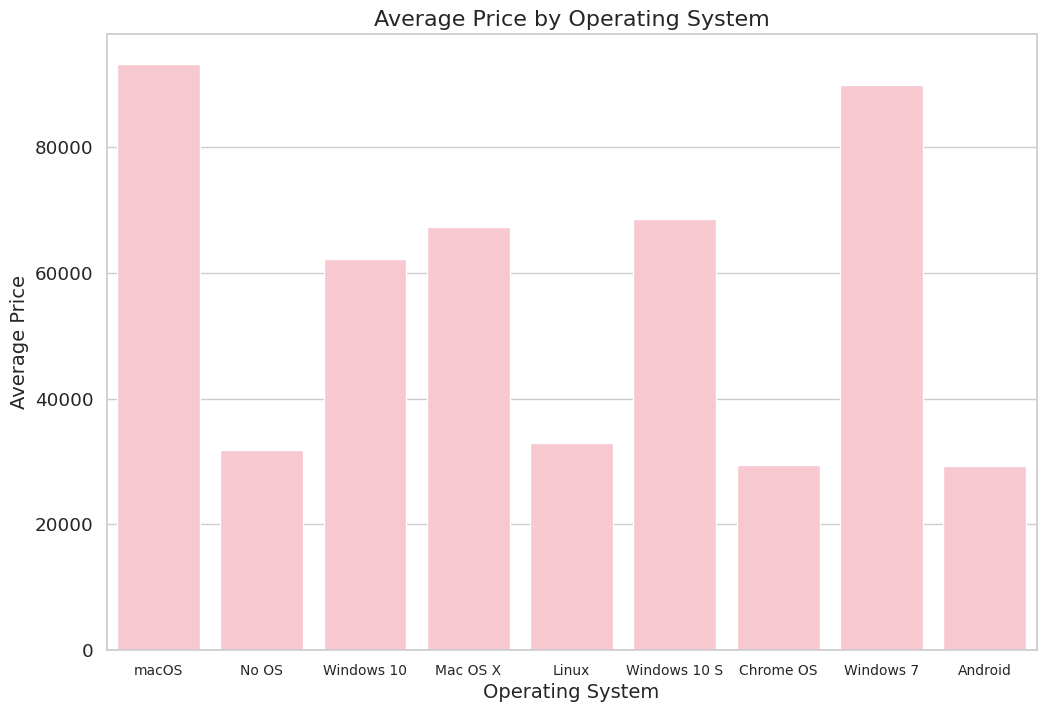

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='OpSys', y='Price', data=df, errorbar=None, color='pink')
plt.title('Average Price by Operating System', fontsize=16)
plt.xlabel('Operating System', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(fontsize=10)
plt.show()

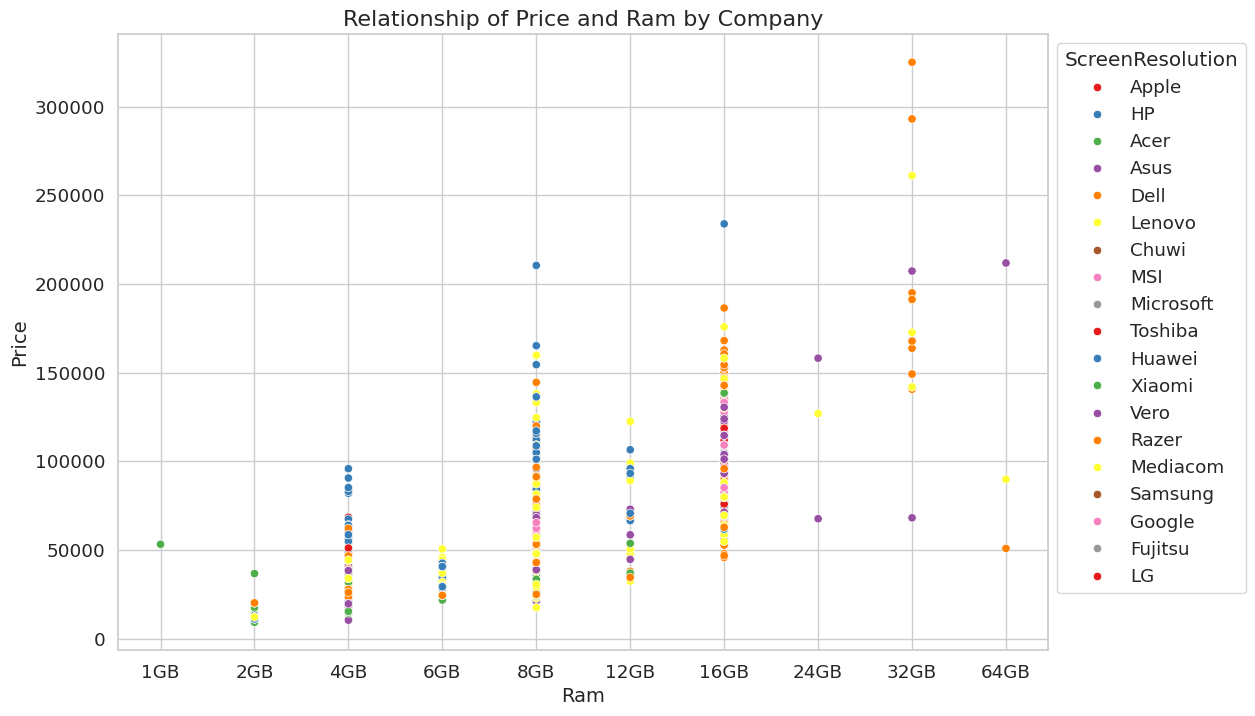

In [ ]:
plt.figure(figsize=(12, 8))
ram_order = ['1GB', '2GB', '4GB', '6GB', '8GB', '12GB', '16GB', '24GB', '32GB', '64GB']
df['Ram'] = pd.Categorical(df['Ram'], categories=ram_order, ordered=True)
sns.scatterplot(x='Ram', y='Price', hue='Company', data=df, palette='Set1')
plt.legend(title='ScreenResolution', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Relationship of Price and Ram by Company', fontsize=16)
plt.xlabel('Ram', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()


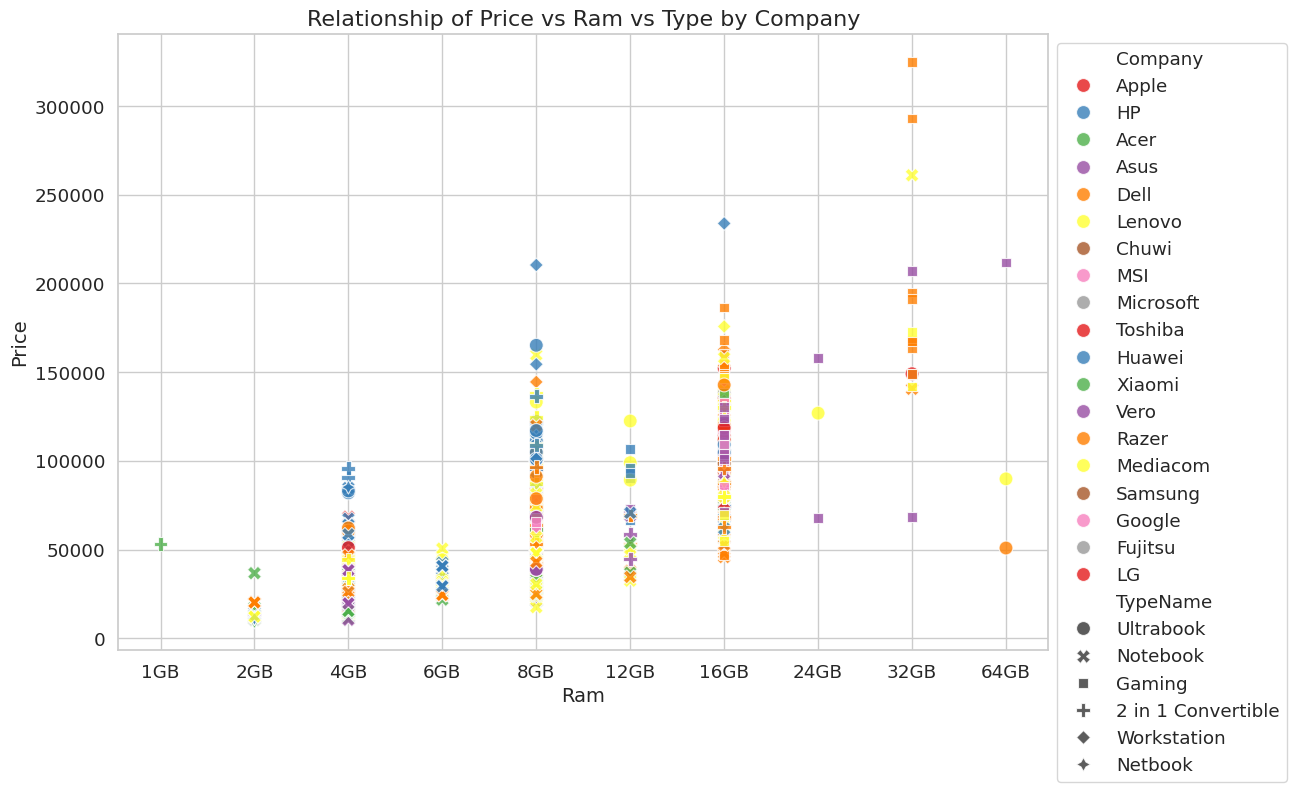

In [ ]:
ram_order = ['1GB', '2GB', '4GB', '6GB', '8GB', '12GB', '16GB', '24GB', '32GB', '64GB']
df['Ram'] = pd.Categorical(df['Ram'], categories=ram_order, ordered=True)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ram', y='Price', hue='Company', style='TypeName', data=df, palette='Set1', alpha=0.8, s=100)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Relationship of Price vs Ram vs Type by Company', fontsize=16)
plt.xlabel('Ram', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()